# Preparing
- mounting google drive to load data
- import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
import os
filterwarnings('ignore')

# Task 1
- Implement data load function for fixed length

In [ ]:
# Task 1 data load function
def dataLoad1():
  data = pd.read_csv('/content/drive/MyDrive/ML_final/train.csv')
  datas = pd.DataFrame(data.iloc[:,0:])
  datas.columns = list(data.iloc[:,0:].columns)
  datas['class'] = data['class']
  data_drop = datas.drop('class', axis=1)
  X = data_drop
  Y = datas['class']  # benign: 0, malicious: 1
  return X, Y
X, Y = dataLoad1()

# Task 2
- Implement data load function for variable length

In [ ]:
# finding pdf with max column
def findColumnWithMaxLen():
  maxColumnLen = 0
  maxFile = ''

  for file in os.listdir(gPath):
    temp = pd.read_csv(gPath + '/' + file)

    if maxColumnLen < len(list(temp.iloc[:,0:].columns)):  # compare column length
      maxColumnLen = len(list(temp.iloc[:,0:].columns))
      maxFile = file
      print(file)

  maxColData = pd.read_csv(gPath + '/' + maxFile)  # pdf with max column
  maxCol = list(maxColData.iloc[:,0:].columns)  # column of max length
  print("maxCol: ", maxCol)
  return maxCol

# merge columns: fix maxCol first, and then append new columns
# this is to match data shape (every pdf data should have same column length)
def mergeColumns(maxCol):
  for file in os.listdir(gPath):
    temp = pd.read_csv(gPath + '/' + file)
    for col in list(temp.iloc[:,0:].columns):
      if col not in maxCol:  # if new column, append
        maxCol.append(col) 

# labeling and adding rows
def addLabelandRowsForData2(maxCol):
  maxCol.append('class')  # label at the end of the column
  finalRows = []
  for file in os.listdir(gPath):
    temp = pd.read_csv(gPath + '/' + file)
    row = [0] * (len(maxCol))  # initially all 0

    for i, col in enumerate(maxCol):
      if col not in list(temp.iloc[:,0:].columns):  # if the column doesn't exist: -1
        row[i] = -1
      elif temp[col].max() > 0:  # if that column has data "1": 1
        row[i] = 1

    row[-1] = file[0]  # read the first letter of the filename(0 or 1): save as label
    finalRows.append(row)
  return finalRows

# final data merging function
# this function makes new dataframe - which we will use for training - using functions above
def mergeData2():
  maxCol = findColumnWithMaxLen()
  mergeColumns(maxCol)
  finalRows = addLabelandRowsForData2(maxCol)
  final_df = pd.DataFrame(finalRows, columns=maxCol)
  return final_df

In [ ]:
# save merged data
final_df = mergeData2()
final_df.to_csv("task2_merged_data.csv")

1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__883b6e1ea6e630b722d51bd50dcca85345dae39f.pdf_.csv
1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__d3313e3c0586a4dde94d0da2f59d376dd88ee1af.pdf_.csv
1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__07b58f54e0e116b4e9a236821b5a8f6db6ab45a9.pdf_.csv
1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__debe5f9e84264061d2d92b46cb0223fbeb454222.pdf_.csv
1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__ea6e30cdcc93414225d29fba6b90bc3d78709e90.pdf_.csv
0_.__cache-ben__home__cuckoo__gptest__dataset__benign_sample__ptin-tpps-pia.pdf_.csv
1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__20a9c4aa608cd57323bad1eac697293d2eee72c1.pdf_.csv
1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__b44f717983b89d7a7a7983fd7b025efa20050058.pdf_.csv
0_.__cache-b

In [ ]:
# Task 2 data load function
def dataLoad2():
  data = pd.read_csv('/content/drive/MyDrive/ML_final/task2_merged_data.csv')
  print(data.head)
  datas = pd.DataFrame(data.iloc[:,0:])
  datas.columns = list(data.iloc[:,0:].columns)
  datas['class'] = data['class']
  data_drop = datas.drop('class', axis=1)
  X = data_drop
  Y = datas['class']  # benign: 0, malicious: 1
  return X, Y
X2, Y2 = dataLoad2()

<bound method NDFrame.head of        Unnamed: 0  AcroForm  AcroForm.1  DA  DR  Encoding  PDFDocEncoding  \
0               0        -1          -1  -1  -1        -1              -1   
1               1        -1          -1  -1  -1        -1              -1   
2               2        -1          -1  -1  -1        -1              -1   
3               3        -1          -1  -1  -1        -1              -1   
4               4         0           0   1  -1         1              -1   
...           ...       ...         ...  ..  ..       ...             ...   
11213       11213         0           0   1  -1         1              -1   
11214       11214        -1          -1  -1  -1        -1              -1   
11215       11215         0           0  -1  -1        -1              -1   
11216       11216        -1          -1  -1  -1        -1              -1   
11217       11217        -1          -1  -1  -1        -1              -1   

       PDFDocEncoding.1  Differences  Type  .

# Task 3 & Task 4
- Implement K-means clustering or any ML algorithms
- Visualize clustering or hidden representation of ML algorithm results

## Model for task 1 data

In [ ]:
# data split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=0)

x_train.shape

(5112, 297)

**1. Clustering (PCA + KMeans)**

In [ ]:
# task 1 data clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # standardize features by removing the mean and scaling to unit variance
x_scaled = sc.fit_transform(X)
pd.DataFrame(x_scaled)  # scaled data

,0,1,2,3,4,5,6,7,8,9,...,287,288,289,290,291,292,293,294,295,296
0,-0.083261,-0.331422,-0.444145,-0.158696,5.163978,-0.376733,4.313270,-0.674645,-0.067515,-0.021671,...,4.306314,-0.244678,-0.021671,-0.021671,-0.153436,-0.641193,-0.049357,-0.34733,-0.075171,-0.115978
1,-0.083261,-0.331422,2.251516,-0.158696,-0.193649,-0.376733,-0.231843,-0.674645,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,-0.641193,-0.049357,-0.34733,-0.182638,-0.167381
2,-0.083261,-0.331422,2.251516,-0.158696,-0.193649,2.538818,-0.231843,-0.674645,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,-0.641193,-0.049357,-0.34733,-0.182638,-0.167381
3,-0.083261,1.026346,-0.444145,-0.158696,-0.193649,-0.376733,-0.231843,-0.674645,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,-0.641193,-0.049357,-0.34733,-0.182638,-0.167381
4,-0.083261,-0.331422,-0.444145,-0.158696,-0.193649,-0.376733,-0.231843,-0.674645,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,-0.641193,-0.049357,-0.34733,-0.182638,-0.167381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,-0.083261,-0.331422,-0.444145,-0.158696,-0.193649,-0.376733,-0.231843,1.482261,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,1.559593,-0.049357,-0.34733,-0.182638,-0.167381
6387,-0.083261,-0.331422,-0.444145,-0.158696,-0.193649,-0.376733,-0.231843,-0.674645,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,-0.641193,-0.049357,-0.34733,-0.182638,-0.167381
6388,12.010412,-0.331422,-0.444145,-0.158696,-0.193649,-0.376733,-0.231843,1.482261,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,1.559593,-0.049357,-0.34733,-0.182638,-0.167381
6389,-0.083261,-0.331422,-0.444145,-0.158696,-0.193649,-0.376733,-0.231843,1.482261,-0.067515,-0.021671,...,-0.232217,-0.244678,-0.021671,-0.021671,-0.153436,1.559593,-0.049357,-0.34733,-0.182638,-0.167381


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)  # cluster 2: malicious or benging
clusters = kmeans.fit(x_scaled)  # k-means train

X['cluster'] = clusters.labels_  # add column "clusters"
X.head()

,1,2,3,4,5,6,7,8,9,10,...,289,290,291,292,293,294,295,296,297,cluster
0,-1,-1.0,-1,-1,1,-1.00,600,-1,-1,-1,...,-1,-1,-1,-1,-1,-1.0,-1,40.0,24.0,1
1,-1,-1.0,1,-1,-1,-1.00,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0,0
2,-1,-1.0,1,-1,-1,0.02,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0,0
3,-1,0.0,-1,-1,-1,-1.00,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0,0
4,-1,-1.0,-1,-1,-1,-1.00,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1.0,-1,-1.0,-1.0,0


In [ ]:
X.groupby('cluster').count()  # count for each cluster

,1,2,3,4,5,6,7,8,9,10,...,288,289,290,291,292,293,294,295,296,297
cluster,,,,,,,,,,,,,,,,,,,,,
0,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065,...,6065,6065,6065,6065,6065,6065,6065,6065,6065,6065
1,326,326,326,326,326,326,326,326,326,326,...,326,326,326,326,326,326,326,326,326,326


In [ ]:
from sklearn.decomposition import PCA
x_copy = x_scaled.copy()
pca = PCA(n_components = 2)  # linear dimensionality reduction: 297 -> 2

pca.fit(x_copy)
x_pca = pca.transform(x_copy)
x_pca

array([[29.72135388,  0.97091435],
       [-1.58836368, -0.22461228],
       [-1.40187872, -0.21610023],
       ...,
       [-2.65680785, -0.38261532],
       [-2.11866629, -0.29361746],
       [-1.82253462, -0.17580172]])

In [ ]:
pca_df = pd.DataFrame(x_pca)  # convert to dataframe
pca_df['cluster'] = X['cluster']
pca_df.head()

,0,1,cluster
0,29.721354,0.970914,1
1,-1.588364,-0.224612,0
2,-1.401879,-0.216100,0
3,-1.629488,-0.375265,0
4,-0.133112,-0.252226,0


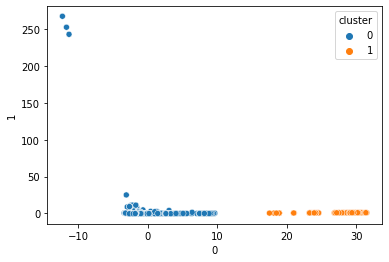

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

**2. SVM**

In [ ]:
# SVM
from keras.models import Sequential, Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = Sequential()
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)  # train with train set
pred = clf.predict(x_val)  # make prediction with validation set
score = accuracy_score(y_val, pred)  # print acc
print('svm prediction score: %s'%score)

svm prediction score: 0.9061767005473026


Accuracy: 0.9061767005473026
F_measure: [0.93015134 0.85714286]
Recall: [1.   0.75]
Precision: [0.86942329 1.        ]




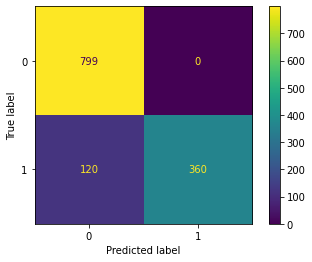

In [ ]:
# visualize confusion matrix of SVM
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plot
import joblib 

pred_y = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(clf, x_test, y_test)
plot.show()

**3. Random Forest Classifier**

rfc prediction score: 0.9984362783424551
Accuracy: 0.9984362783424551
F_measure: [0.99875    0.99791232]
Recall: [1.         0.99583333]
Precision: [0.99750312 1.        ]




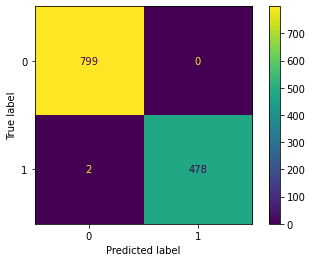

In [ ]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=42)

rfc.fit(x_train, y_train)  # train with train set
pred = rfc.predict(x_val)  # make prediction with validation set
score = accuracy_score(y_val, pred)  # print acc
print('rfc prediction score: %s'%score)

# visualzie confusion matrix of random forest
pred_y = rfc.predict(x_test)
accuracy = rfc.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(rfc, x_test, y_test)
plot.show()

**4. KNN**

0.9898358092259578


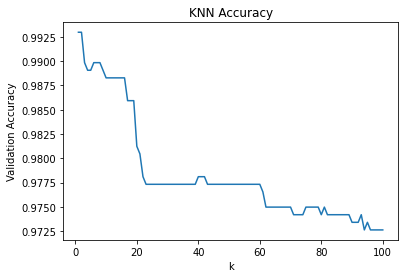

Accuracy: 0.9726348709929633
F_measure: [0.97822029 0.96319664]
Recall: [0.98372966 0.95416667]
Precision: [0.97277228 0.97239915]




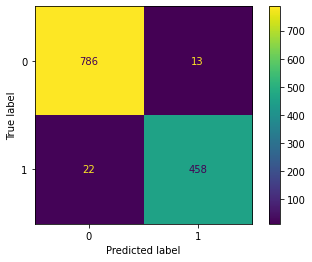

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)  # train with train set
print(knn.score(x_val, y_val))  # print acc of validation set

# plot the graph of n_neighbors
k_list = range(1,101)
accuracies = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  accuracies.append(knn.score(x_val, y_val))

plt.plot(k_list, accuracies)  # result of the plot: val acc likely decreases with increasing k
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("KNN Accuracy")
plt.show()

# visualize confusion matrix of knn
pred_y = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(knn, x_test, y_test)
plot.show()

**5. Decision Tree Classifier**

dt prediction score: 1.0
Accuracy: 1.0
F_measure: [1. 1.]
Recall: [1. 1.]
Precision: [1. 1.]




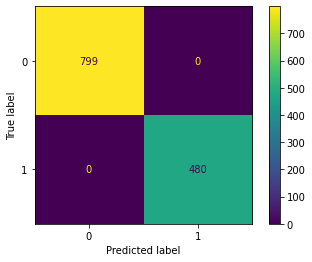

In [ ]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=20)
tree_model.fit(x_train, y_train)  # train with train set
tree_pred = tree_model.predict(x_val)  # make prediction with validation set
score = accuracy_score(y_val, tree_pred)  # print acc
print('dt prediction score: %s'%score)

# visualize confusion matrix of decision tree 
pred_y = tree_model.predict(x_test)
accuracy = tree_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(tree_model, x_test, y_test)
plot.show()

**6. RNN**

In [ ]:
# RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, SimpleRNN
from keras.layers import SpatialDropout1D
import time
start_time = time.time()

# build RNN model
rnn = Sequential()
rnn.add(LSTM(units = 10,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))  # first LSTM layer
rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
rnn.add(Dropout(0.2))  # dropout regularization
rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))  # output layer

# compiling RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error' ,metrics=['accuracy'])

# fitting RNN to the training set
t = rnn.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data=(x_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/10
20/20 [==============================] - 28s 941ms/step - loss: 0.5816 - accuracy: 0.5216 - val_loss: 0.2401 - val_accuracy: 0.5687
Epoch 2/10
20/20 [==============================] - 17s 863ms/step - loss: 0.4222 - accuracy: 0.5297 - val_loss: 0.2333 - val_accuracy: 0.6160
Epoch 3/10
20/20 [==============================] - 17s 862ms/step - loss: 0.3439 - accuracy: 0.5397 - val_loss: 0.2257 - val_accuracy: 0.6255
Epoch 4/10
20/20 [==============================] - 20s 998ms/step - loss: 0.3029 - accuracy: 0.5555 - val_loss: 0.2288 - val_accuracy: 0.6014
Epoch 5/10
20/20 [==============================] - 17s 856ms/step - loss: 0.2747 - accuracy: 0.5664 - val_loss: 0.2235 - val_accuracy: 0.6180
Epoch 6/10
20/20 [==============================] - 17s 851ms/step - loss: 0.2765 - accuracy: 0.5637 - val_loss: 0.2195 - val_accuracy: 0.6300
Epoch 7/10
20/20 [==============================] - 17s 849ms/step - loss: 0.2488 - accuracy: 0.5874 - val_loss: 0.2179 - val_accuracy: 0.6475

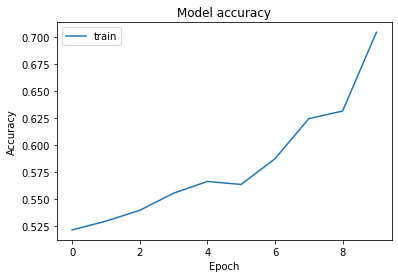

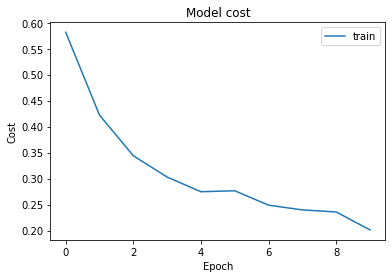

In [ ]:
# visulaizing accuracy and cost of RNN model
import matplotlib.pyplot as plt
plt.plot(t.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(t.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# print test loss and accuracy of RNN
test_loss, test_accuracy = rnn.evaluate(x_test, y_test)
print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

40/40 [==============================] - 3s 64ms/step - loss: 0.1345 - accuracy: 0.8169

Test loss: 0.134453. Test accuracy: 81.688410%


## Model for task 2 data

In [ ]:
# analyzing data
# benign data: 358, malicious data: 10860
gPath = '/content/drive/MyDrive/BigData/data'
benCnt = 0
malCnt = 0

for file in os.listdir(gPath):
  temp = pd.read_csv(gPath + '/' + file)
  if file[0] == '0':
    benCnt += 1
  else:
    malCnt += 1

print(benCnt)
print(malCnt)

358
10860


In [ ]:
# data split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(X2, Y2, test_size=0.2, random_state=0)

x_train.shape

(8974, 6804)

**1. Clustering (PCA + KMeans)**

In [ ]:
# removing columns: 
# if data that have 0 or 1 for that column are less than 2, we think of that column as unimportant feature
count = 0
colList = []
for col in X2:
  if (len(X2[X2[col] == 1]) + len(X2[X2[col] == 0])) <= 2:
    count += 1
    colList.append(col)
print(count)

3269


In [ ]:
X2_drop = X2.drop(colList, axis=1)  # drop the columns

In [ ]:
# task 2 data clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  # standardize features by removing the mean and scaling to unit variance
x_scaled = sc.fit_transform(X2_drop)
pd.DataFrame(x_scaled)  # scaled data

,0,1,2,3,4,5,6,7,8,9,...,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534
0,-0.450272,-0.449842,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
1,-0.450272,-0.449842,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
2,-0.450272,-0.449842,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
3,-0.450272,-0.449842,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
4,2.220881,2.223002,3.034380,-0.113631,2.189617,-0.095791,-0.095791,-0.1277,0.023833,1.905704,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,2.220881,2.223002,3.034380,-0.113631,2.189617,-0.095791,-0.095791,-0.1277,0.023833,1.905704,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
11214,-0.450272,-0.449842,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
11215,2.220881,2.223002,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886
11216,-0.450272,-0.449842,-0.329557,-0.113631,-0.456701,-0.095791,-0.095791,-0.1277,0.023833,-0.524740,...,-0.016355,-0.016355,-0.016355,-0.016355,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886,-0.018886


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)  # cluster 2: malicious or benging
clusters = kmeans.fit(x_scaled)  # k-means train

X2_drop['cluster'] = clusters.labels_  # add column "cluster"
X2_drop.head()

,AcroForm,AcroForm.1,DA,DR,Encoding,PDFDocEncoding,PDFDocEncoding.1,Differences,Type,Font,...,FOV,XN,RGS,Info.1,Keywords,Info.2,Info.3,Author,Producer,cluster
0,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,0,0,1,-1,1,-1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [ ]:
X2_drop.groupby('cluster').count()  # count for each cluster

,AcroForm,AcroForm.1,DA,DR,Encoding,PDFDocEncoding,PDFDocEncoding.1,Differences,Type,Font,...,LS,FOV,XN,RGS,Info.1,Keywords,Info.2,Info.3,Author,Producer
cluster,,,,,,,,,,,,,,,,,,,,,
0,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134
1,11084,11084,11084,11084,11084,11084,11084,11084,11084,11084,...,11084,11084,11084,11084,11084,11084,11084,11084,11084,11084


In [ ]:
from sklearn.decomposition import PCA
x_copy = x_scaled.copy()
pca = PCA(n_components = 2)  # linear dimensionality reduction: 297 -> 2

pca.fit(x_copy)
x_pca = pca.transform(x_copy)
x_pca

array([[-3.10622198,  0.49300028],
       [-3.04984121,  0.56174087],
       [-3.04984121,  0.56174087],
       ...,
       [-2.68833602,  0.76639086],
       [-3.10622198,  0.49300028],
       [-3.10622198,  0.49300028]])

In [ ]:
pca_df = pd.DataFrame(x_pca)  # convert to dataframe
pca_df['cluster'] = X2_drop['cluster']
pca_df.head()

,0,1,cluster
0,-3.106222,0.493000,1
1,-3.049841,0.561741,1
2,-3.049841,0.561741,1
3,-3.106222,0.493000,1
4,-2.253729,0.039921,1


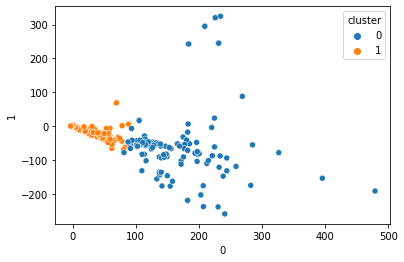

In [ ]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

**2. SVM**

svm prediction score: 0.9982174688057041
Accuracy: 0.9982174688057041
F_measure: [0.95744681 0.99908967]
Recall: [0.91836735 1.        ]
Precision: [1.         0.99818099]




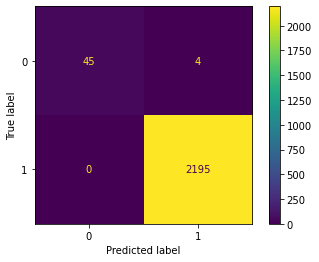

In [ ]:
# SVM
clf = Sequential()
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)  # train with train set
pred = clf.predict(x_val)  # make prediction with validation set
score = accuracy_score(y_val, pred)  # print acc
print('svm prediction score: %s'%score)

# visualize confusion matrix of SVM
pred_y = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(clf, x_test, y_test)
plot.show()

**3. Random Forest Classifier**

rfc prediction score: 0.9986631016042781
Accuracy: 0.9986631016042781
F_measure: [0.96969697 0.99931647]
Recall: [0.97959184 0.99908884]
Precision: [0.96       0.99954421]




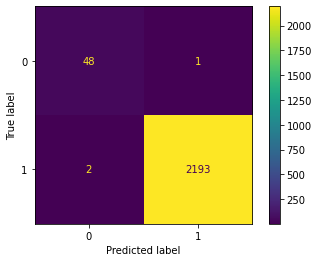

In [ ]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)  # train with train set
pred = rfc.predict(x_val)  # make prediction with validation set
score = accuracy_score(y_val, pred)  # print acc
print('rfc prediction score: %s'%score)

# visualize confusion matrix of random forest
pred_y = rfc.predict(x_test)
accuracy = rfc.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(rfc, x_test, y_test)
plot.show()

**4. KNN**

Accuracy: 0.9982174688057041
F_measure: [0.95744681 0.99908967]
Recall: [0.91836735 1.        ]
Precision: [1.         0.99818099]




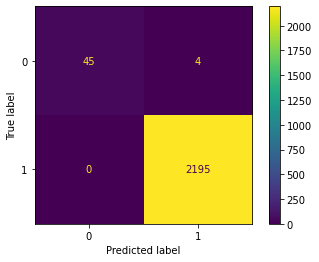

In [ ]:
# knn training & visualization
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)
print(knn.score(x_val, y_val))

predcted_y = knn.predict(x_test)
accuracy = knn.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, predcted_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, predcted_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, predcted_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(knn, x_test, y_test)
plot.show()

**5. Decision Tree Classifier**

dt prediction score: 0.9991087344028521
Accuracy: 0.9991087344028521
F_measure: [0.97916667 0.99954463]
Recall: [0.95918367 1.        ]
Precision: [1.         0.99908967]




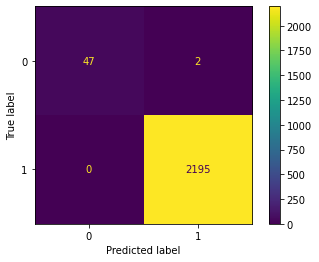

In [ ]:
# decision tree
tree_model = DecisionTreeClassifier(max_depth=20)
tree_model.fit(x_train, y_train)  # train with train set
tree_pred = tree_model.predict(x_val)  # make prediction with validation set
score = accuracy_score(y_val, tree_pred)  # print acc
print('dt prediction score: %s'%score)

# visualize confusion matrix of decision tree
pred_y = tree_model.predict(x_test)
accuracy = tree_model.score(x_test, y_test)
print(f"Accuracy: {accuracy}")
f_measure = f1_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"F_measure: {f_measure}")
recall = recall_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Recall: {recall}")
precision = precision_score(y_test, pred_y, average=None, labels=[0, 1])
print(f"Precision: {precision}\n\n")
plot_confusion_matrix(tree_model, x_test, y_test)
plot.show()

**6. RNN**

In [ ]:
# RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, SimpleRNN
from keras.layers import SpatialDropout1D
import time
start_time = time.time()

# build RNN model
rnn = Sequential()
rnn.add(LSTM(units = 10,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))  # first LSTM layer
rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
rnn.add(Dropout(0.2))  # dropout regularization
rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 1))  # output layer

# compiling RNN
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error' ,metrics=['accuracy'])

# fitting RNN to the training set
t = rnn.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data=(x_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# visulaizing accuracy and cost of RNN model
import matplotlib.pyplot as plt
plt.plot(t.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.plot(t.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# print test loss and accuracy of RNN
test_loss, test_accuracy = rnn.evaluate(x_test, y_test)
print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))